<a href="https://colab.research.google.com/github/victornator25/Data-Science/blob/main/Tweets_ML_Aplicaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Procesamiento de lenguaje natural
#!conda install nltk
#nltk.download()
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('stopwords')
from nltk.corpus import stopwords

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('twitter_dataset.csv')#, sep='\t', names=["label", "message"])
df.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21


In [3]:
df.shape

(10000, 6)

In [4]:
df['Text'].unique()

array(['Party least receive say or single. Prevent prevent husband affect. May himself cup style evening protect. Effect another themselves stage perform.\nPossible try tax share style television with. Successful much sell development economy effect.',
       'Hotel still Congress may member staff. Media draw buy fly. Identify on another turn minute would.\nLocal subject way believe which question some message. Own all imagine join agency indicate.',
       'Nice be her debate industry that year. Film where generation push discover partner level.\nNearly money store style may enjoy. Kid discuss blue save. Model another about along.\nEverybody especially dinner character yard.',
       ...,
       'You day agent likely region. Teacher data message build as third. Child forward her recent admit order black.\nTrip source four into low. Table data him sing.\nPlan assume land talk brother late less. Air effect reduce line.',
       'Guess without successful save. Particular natural manageme

In [5]:
df['length'] = df['Text'].apply(len)
df.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,length
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51,241
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58,190
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19,219
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29,201
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21,274


In [10]:
df.length.describe()

count    10000.00000
mean       226.89360
std         35.53295
min         83.00000
25%        203.00000
50%        232.00000
75%        255.00000
max        279.00000
Name: length, dtype: float64

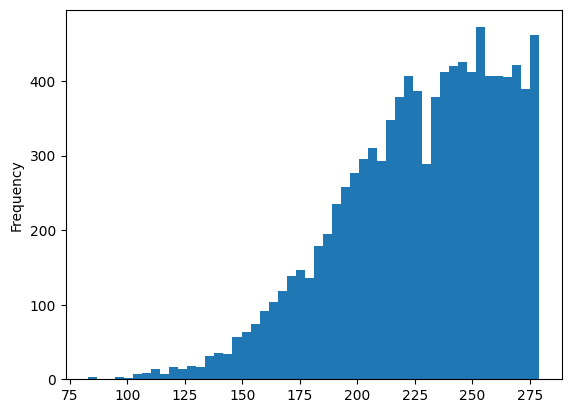

In [7]:
df['length'].plot(bins=50, kind='hist');

In [8]:
df[df['length'] == 275]['Text'].iloc[0]

'Near hot support.\nThough opportunity amount blue skin. Check thought their boy road avoid. Bad ground respond point.\nFace cause American discussion. Draw material across.\nParent star pay design start first operation. Smile agent consumer generation.\nNote test responsibility.'

In [9]:
#df.hist(column='length', by='Text', bins=50, figsize=(12,4));

In [15]:
df[df['Text'].str.contains('gun')].head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,length
6,7,fieldsbrian,Receive difference their. Responsibility build...,12,43,2023-01-02 03:15:54,267
46,47,ronald32,Have country now difficult son ten. Half able ...,59,72,2023-01-22 08:40:44,224
169,170,kevin53,Tell knowledge them national spring draw inves...,26,71,2023-04-11 03:27:03,259
201,202,brian30,A campaign none. Movement nation occur practic...,83,87,2023-02-27 10:54:00,208
208,209,waltonshelley,See gun low worker key two. Become imagine ran...,58,8,2023-03-09 23:43:32,275


In [16]:
import string

msg = 'example! of message with comma, dots... and others?=(#)'

nopunc = [c for c in msg if c not in string.punctuation]
nopunc = ''.join(nopunc)
nopunc

'example of message with comma dots and others'

In [17]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
def no_punct(text):
    nopunc = [c for c in text if c not in string.punctuation]
    return ''.join(nopunc)
     
df['message_no_punct'] = df['Text'].apply(no_punct)

In [19]:
#Tokenizar: Crear listas de palabras unicas
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords.words('english')[0:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [20]:
def procesar_texto(text):
    nopunc = [c for c in text if c not in string.punctuation]
    nopunc =  ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [21]:
df['Text'].apply(procesar_texto)

0       [Party, least, receive, say, single, Prevent, ...
1       [Hotel, still, Congress, may, member, staff, M...
2       [Nice, debate, industry, year, Film, generatio...
3       [Laugh, explain, situation, career, occur, ser...
4       [Involve, sense, former, often, approach, gove...
                              ...                        
9995    [Agree, reflect, military, box, ability, ever,...
9996    [Born, push, still, Degree, sometimes, control...
9997    [day, agent, likely, region, Teacher, data, me...
9998    [Guess, without, successful, save, Particular,...
9999    [Body, onto, understand, team, product, beauti...
Name: Text, Length: 10000, dtype: object

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


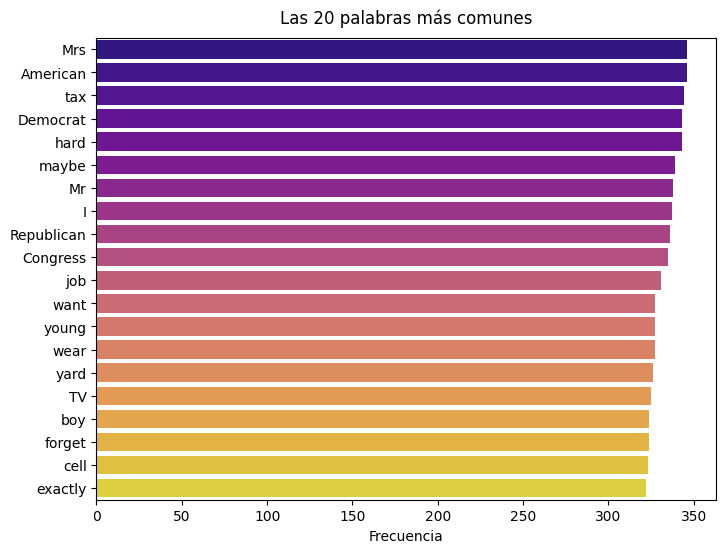

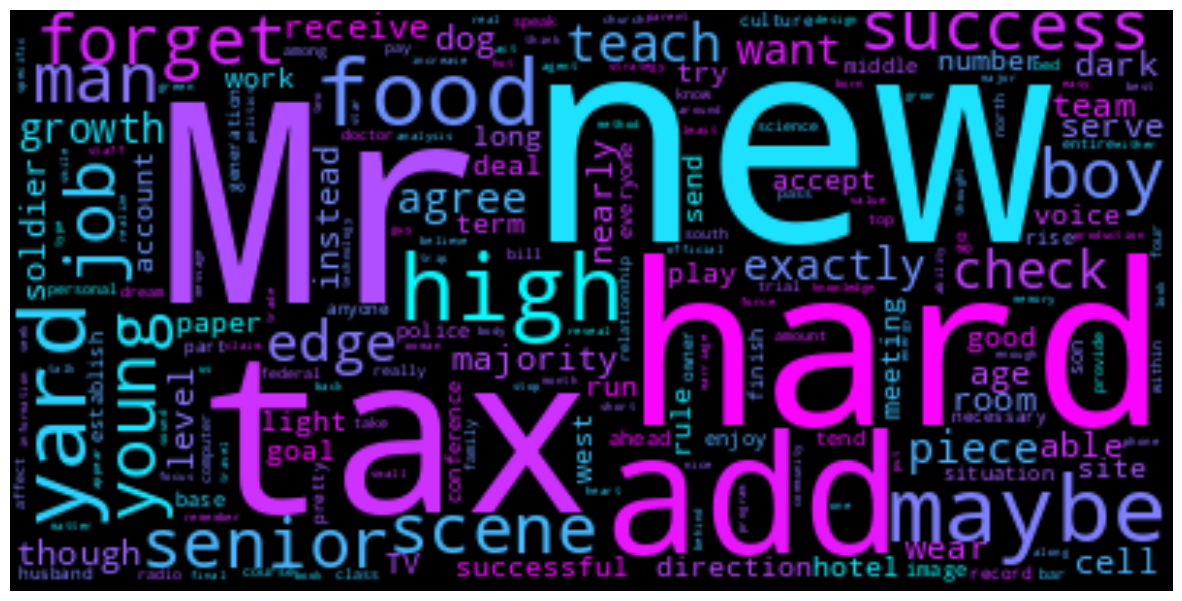

In [22]:
nltk.download('punkt')
tokenizar = df['message_no_punct'].apply(nltk.word_tokenize) 
all_words = tokenizar.sum() #union en una sola lista

freq_dist = nltk.FreqDist(all_words)

no_stop_words = [word for word in all_words if word not in stopwords.words('english')]
freq_dist_no_stop_words = nltk.FreqDist(no_stop_words)

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_no_stop_words.most_common(20))))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

sns.barplot(x = pd.to_numeric(most_common_20[:, 1]), y = most_common_20[:, 0], ax=ax, palette='plasma', orient='h');
ax.set_title('Las 20 palabras más comunes', pad=10)
ax.set_xlabel('Frecuencia')

from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=100, background_color="black", colormap='cool').generate(' '.join(no_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

In [23]:
#Vectorizción 
#Convertir el texto en vectores numéricos. Esto permite que las palabras sean procesadas por algoritmos de ML.
#Construcción de vocabulario: palabras únicas
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
# Bag-of-Words (bow), conteo de palabras únicas
bow_transformer = CountVectorizer(analyzer=procesar_texto).fit(df['Text'])

print(len(bow_transformer.vocabulary_))

1732


In [25]:
print(df['Text'][100])
print(procesar_texto(df['Text'][100]))
bow_msg100 = bow_transformer.transform([df['Text'][100]])
print(bow_msg100)

Indicate memory manage fact. Ready fund lay scientist federal case. According market anything them provide.
Newspaper he social more size paper morning report.
National up data many. Staff position statement partner. Organization vote beyond not Mr security box.
['Indicate', 'memory', 'manage', 'fact', 'Ready', 'fund', 'lay', 'scientist', 'federal', 'case', 'According', 'market', 'anything', 'provide', 'Newspaper', 'social', 'size', 'paper', 'morning', 'report', 'National', 'data', 'many', 'Staff', 'position', 'statement', 'partner', 'Organization', 'vote', 'beyond', 'Mr', 'security', 'box']
  (0, 3)	1
  (0, 366)	1
  (0, 475)	1
  (0, 482)	1
  (0, 493)	1
  (0, 519)	1
  (0, 607)	1
  (0, 725)	1
  (0, 910)	1
  (0, 952)	1
  (0, 964)	1
  (0, 984)	1
  (0, 1047)	1
  (0, 1127)	1
  (0, 1135)	1
  (0, 1171)	1
  (0, 1267)	1
  (0, 1303)	1
  (0, 1306)	1
  (0, 1307)	1
  (0, 1320)	1
  (0, 1337)	1
  (0, 1391)	1
  (0, 1397)	1
  (0, 1429)	1
  (0, 1453)	1
  (0, 1491)	1
  (0, 1519)	1
  (0, 1526)	1
  (0, 156

In [26]:
df_bow = bow_transformer.transform(df['Text'])

In [28]:
print('Sparse Matrix: ', df_bow.shape)
print('valores != 0: ', df_bow.nnz)

Sparse Matrix:  (10000, 1732)
valores != 0:  300120


In [29]:
#Normalización de la frecuencia: una medida de la importancia de la palabra.
#tf= (frecuencia de una palabra)/(numero total de palabras)
#idf = log((numero total de documentos)/(documentos en los que aparece la palabra))
#term frequency-inverse document frequency
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(df_bow)
df_tfidf = tfidf_transformer.transform(df_bow)

In [31]:
#Construcción del modelo
from sklearn.ensemble import RandomForestClassifier
#spam_detect_model = RandomForestClassifier().fit(df_tfidf, df['label'])

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(df['Text'], df['Likes'], test_size=0.2)

In [32]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=procesar_texto)),  # valores numericos unicos para cada palabra
    ('tfidf', TfidfTransformer()),  # importancia de cada palabra
    ('classifier', RandomForestClassifier()),  # modelo
])

In [33]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function procesar_texto at 0x7f0c293c7400>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

Score:  0.009


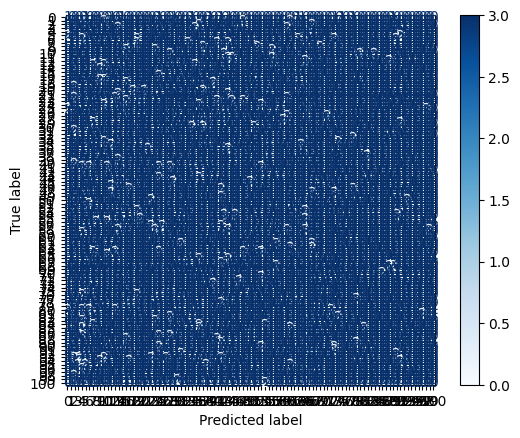

In [34]:
predicciones = pipeline.predict(msg_test)

print('Score: ', pipeline.score(msg_test, label_test))

matriz_confusion = confusion_matrix(label_test, predicciones)
ConfusionMatrixDisplay(matriz_confusion).plot(cmap=plt.cm.Blues);